In [22]:
from cProfile import label
from cmath import exp, pi
from numpy import tan, sin, sqrt,cos,arctan,arcsin,arccos
from re import A
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as npy
from scipy.signal import savgol_filter
from matplotlib.pyplot import MultipleLocator
from iminuit import Minuit
from matplotlib import cm
import iminuit
from iminuit.cost import LeastSquares
# import latex
# plt.style.reload_library()
plt.style.use(['science'])
# plt.style.use(['science','ieee'])
# plt.style.use(['science','no-latex'])

In [23]:

def calculate_index(phi,delta):
    phi=float(phi*pi/180)
    delta=float(delta*pi/180)
    anglei=63/180*pi
    rho=tan(phi)*exp(delta*1j)
    n1=1.
    # print('rho',rho)
    epsilon= (n1**2) * (sin(anglei)**2) * ( 1+(tan(anglei)**2)*((1-rho)/(1+rho))**2) 
    ep_re=epsilon.real
    ep_im=epsilon.imag
    n2=(1./sqrt(2.) * sqrt( sqrt(ep_re**2+ep_im**2) +ep_re)).real
    k2=(1./sqrt(2.) * sqrt( sqrt(ep_re**2+ep_im**2) -ep_re)).real
    return n2,k2

            
def Fun(x,a0,a1,a2,k,b): #define fit function
    phi=k*x+b
    # return a0+a1*npy.cos(2*phi)
    return a0+a1*npy.cos(2*phi)+ a2*npy.sin(2*phi)

As=2.312
Ps=2.241
anglei=63/180*pi
# anglei=65/180*pi

def intensity_fun(A,alpha,beta): #define fit function
    A=A-As
    # return a0+a1*npy.cos(2*phi)
    return 1+alpha*npy.cos(2*A)+ beta*npy.sin(2*A)

def calculate_tanphi_cosdelta(n,k,anglei1):
    
    n1=1
    n2=n+k*1j
    anglei2=arcsin(n1*sin(anglei1)/n2 )
    rp=tan(anglei1-anglei2)/tan(anglei1+anglei2)
    rs=sin(anglei2-anglei1)/sin(anglei2+anglei1)
    rho=rp/rs
    tanphi=npy.abs(rho)
    delta=npy.arccos(rho.imag/rho.real)
    return tanphi,delta

def calculate_alpha_beta(tanphi,delta,P):
    P=P
    alpha=(tanphi**2-tan(P)**2)/(tanphi**2+tan(P)**2)
    beta=2*tanphi*cos(delta)*tan(P)/(tanphi**2+tan(P)**2)
    return alpha,beta

def ntointensity_max(n,k,anglei1,P):
    n1=1
    n2=n+k*1j
    anglei2=arcsin(n1*sin(anglei1)/n2 )
    rp=tan(anglei1-anglei2)/tan(anglei1+anglei2)
    rs=sin(anglei2-anglei1)/sin(anglei2+anglei1)
    rho=rp/rs
    tanphi=npy.abs(rho)
    delta=npy.arccos(rho.imag/rho.real)
    alpha=(tanphi**2-tan(P)**2)/(tanphi**2+tan(P)**2)
    beta=2*tanphi*cos(delta)*tan(P)/(tanphi**2+tan(P)**2)
    return 1+alpha
def intensity_max_change(n,k,anglei1,P):
    h=0.001
    sensi=0
    for i in range(6):
        max=ntointensity_max(n+i*+h,k,anglei1,P)
        min=ntointensity_max(n+i-h,k,anglei1,P)
        sensi+=abs(max-min)/(2*h)
    return sensi/6


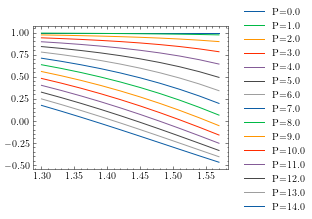

In [36]:
n_input=[(n*0.03+1.3) for n in range(10) ]
k_input=[0]*20
P=npy.array([pi/180*i for i in range(15)])
A=[pi/360*i for i in range(360)]
A=npy.array(A)


fig1,ax1=plt.subplots()
for j in range(15):
    fig,ax = plt.subplots()
    alpha_input=[]
    beta_input=[]
    for i in range(10):
        tanphi,delta=calculate_tanphi_cosdelta(n_input[i],k_input[i],anglei)
        alpha,beta=calculate_alpha_beta(tanphi,delta,P[j])
        alpha_input.append(alpha)
        beta_input.append(beta)
        ax.plot(A,intensity_fun(A,alpha,beta),label='n='+str(round(n_input[i],2)),linewidth=0.7 )
    ax.set_xlabel('Angle A')
    ax.set_ylabel('Intensity')
    ax.set_xlabel('n')

    ax1.plot(n_input,alpha_input,label="P="+str(round(P[j]*180/pi,0)))

    fig.legend(bbox_to_anchor=(0.95, 0.7), loc=2, borderaxespad=0)
    fig.patch.set_facecolor('white')
    fig.savefig('figure_I63/intensity_PreP'+str(round(P[j]/pi*180,1))+'.png',dpi=1000)
    plt.close()

    fig,ax = plt.subplots(2,1,sharex=True)
    ax[1].plot(n_input,alpha_input,label="$\\alpha$")
    ax[0].plot(n_input,beta_input,label="$\\beta$")
    ax[1].set_xlabel('Wave length (nm)')
    fig.legend(bbox_to_anchor=(0.95, 0.7), loc=2, borderaxespad=0)
    fig.patch.set_facecolor('white')
    # fig.savefig('figure_I63/alphabeta_PreP'+str(round(P[j]/pi*180,1))+'.png',dpi=1000)
    plt.close()
# ax1.legend()
# ax1.set_title("$\alpha$")
# fig1.patch.set_facecolor('white')
fig1.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0)


In [32]:

# ax1.set_title("$\alpha$")
# fig1.legend(bbox_to_anchor=(0.95, 0.7), loc=1, borderaxespad=0)
# ax1.legend()
# fig1.patch.set_facecolor('white')
# fig1.savefig('alpha.png',dpi=1000)
# fig1.savefig('figure_I63/alpha.png',dpi=1000)


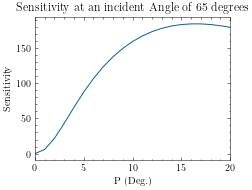

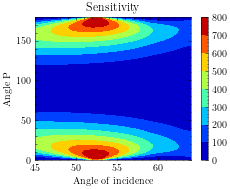

In [26]:
# A=[pi/360*i for i in range(360)]
# P=[pi/180*i for i in range(180)]
P=[pi/180*i for i in range(180)]
anglei_input=[pi/180*(i+45) for i in range(20)]
# anglei_input=[pi/180*(i+30) for i in range(50)]
P=npy.array(P)
ap=P/pi*180
sensitivity=intensity_max_change(1.3,0,anglei,P)
fig,ax=plt.subplots()
ax.plot(ap,sensitivity,label='Sensitivity')
# ax.legend()
ax.set_xlabel("P (Deg.)")
ax.set_ylabel('Sensitivity')
ax.set_title('Sensitivity at an incident Angle of 65 degrees')
fig.patch.set_facecolor('white')
fig.savefig('figure_I63/sensitivityVsP.png',dpi=1000)
ax.set_xlim(0,20)
fig.savefig('figure_I63/sensitivityVsP_enlarge.png',dpi=1000)


n_input=npy.array(n_input)
anglei_input=npy.array(anglei_input)
ai=anglei_input/pi*180
ai,ap=npy.meshgrid(ai,ap )
anglei_input,P=npy.meshgrid(anglei_input, P)
# maxintensity=ntointensity_max(1.3,0,anglei_input,P)
maxintensity=intensity_max_change(1.3,0,anglei_input,P)
fig,ax=plt.subplots()
# cset1 = ax.contourf(ai,ap, maxintensity) 
cset1 = ax.contourf(ai,ap, maxintensity,cmap=cm.jet) 
ax.set_xlabel('Angle of incidence')
ax.set_ylabel('Angle P')
ax.set_title('Sensitivity')
cbar = fig.colorbar(cset1)
plt.show()
fig.patch.set_facecolor('white')
# fig.savefig('figure_pre/find_p_anglei_65Deg.png',dpi=1000)
fig.savefig('figure_pre/find_p_anglei.png',dpi=1000)
# ax.set_xlim(64,66)
# ax.set_xlim(45,65)
# ax.set_ylim(0,15)
# # fig.savefig('figure_pre/find_p_anglei_65Deg_enlarge.png',dpi=1000)
# fig.savefig('figure_pre/find_p_anglei_enlarge.png',dpi=1000)

In [27]:
print(2.241/pi*180)

128.3998418888175
